In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Import Data

In [17]:
path = "Đường dẫn thư mục chưa dữ liệu"

In [21]:
file_name = input('Enter file name: ')
df = pd.read_csv(path + file_name)
df.head()

Enter file name:  sales2019_1.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Clean And Preprocess Data

### Step1: Gộp các bảng thành 1 bảng duy nhất.
Trong trường hợp bạn có 12 bảng dữ liệu của 12 tháng nhưng muốn gộp thành 1 bảng để tiện cho việc phân tích. Còn nếu file của bạn là file 1 năm thì thôi, bỏ qua step này.

In [26]:
frame = []
#Check xem đủ hàng không
all_length = []
for file in os.listdir(path):
    #trong trường hợp thư mục có nhiều file lẻ lẻ khác thì nên có bước chọn csv:
    if file.endswith(".csv"):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frame.append(df1)
        Y_df = pd.concat(frame)
        length_1month= len(df1.index)
        all_length.append(length_1month)
Y_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [27]:
sum(all_length)

186850

In [29]:
Y_df.to_csv('Annual_Sales_2019.csv')

In [30]:
df = Y_df

### Step 2: Add month Column
Tách tháng thành một cột riêng để tiện thao tác

In [37]:
# Tạo mục rỗng
df['Month'] = ''

# Lấy 2 ký tự đầu của Cột ngày tháng để làm dữ liệu chèn vào cột Tháng
df['Order Date'].str.slice(start = 0, stop = 2, step = 1)
#lười thì code vầy cho nhanh: df['Oder Date'].str[0:2]

0        01
1        01
2        01
3        01
4        01
         ..
11681    09
11682    09
11683    09
11684    09
11685    09
Name: Order Date, Length: 186850, dtype: object

In [40]:
# Thêm vào cột vừa tạo (thực ra 2 thao tác trên gom thành 1 cái như vầy thôi
# Chủ yếu làm lẻ lẻ để dễ hiểu, tiện sau này tra cứu lại thì biết ngỏ vì sao nó ra như vầy)
df['Month'] = df['Order Date'].str.slice(start = 0, stop = 2, step = 1)

In [41]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


### Step 3: check Null Values and Table Heads

In [46]:
#drop những hàng đều có null / NaN
df.dropna(inplace = True)

In [47]:
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

In [51]:
# Check table heads
df[df['Month']== 'Or']
# Suprise Mother Father! Cái quái quể gì đây???? Mấy hàng này là gì???

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


Sau Khi check thì bạn phát hiện một lô một lốc các hàng lạ hoắc lạ huơ?
Thực ra đó là các hàng tiêu đề, mà trong quá trình gộp các bảng số liệu đã vô tình gộp luôn cả hàng tiêu đề.
Nên drop nó luôn đi.

In [52]:
df = df[df['Month'] != 'Or']

In [54]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


# Reporting

### Task 1: What was the best month for sales? How much was earned that month?

In [60]:
# Hiện tại data không cho biết tổng số bán hàng dựa trên số sản phẩm mua, nên tạo thêm một cột sales
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Sales']

Code trên chạy được chết liền. Bạn nên check kĩ trước bảng dữ liệu của mình nó có đúng định dạng không.
Nếu Như check thì bạn sẽ thấy cột Quantity Ordered và Price Each đang ở dạng Object. Nên chúng sẽ không nhân được đâu.

In [63]:
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

object
object


In [98]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3600515155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast = 'integer')
C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3600515155.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], downcast = 'float')


In [81]:
print(df['Quantity Ordered'].dtype)
print(df['Price Each'].dtype)

int8
float32


Bây giờ thì run code tạo cột Sales được rồi.

In [82]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df['Sales']

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3134733563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


0        700.000000
1         14.950000
2         23.980000
3        149.990005
4         11.990000
            ...    
11681      8.970000
11682    700.000000
11683    700.000000
11684    379.989990
11685     11.950000
Name: Sales, Length: 185950, dtype: float32

In [83]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [101]:
df_month_sales = df.loc[:,('Month','Sales')]

In [125]:
sale_values = df_month_sales.groupby('Month').sum()['Sales']
sale_values.sort_values(ascending=False)

Month
12    4613443.50
10    3736726.75
04    3390670.25
11    3199603.25
05    3152606.75
03    2807100.25
07    2647775.75
06    2577802.25
08    2244467.75
02    2202022.50
09    2097560.00
01    1822256.75
Name: Sales, dtype: float32

Visualize kết quả cho dễ nhìn

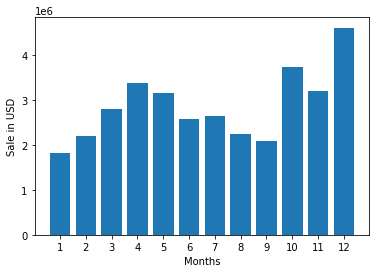

In [140]:
months = range(1,13)
plt.bar(x = months, height = sale_values)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sale in USD')
plt.show()

Thường sau khi có kết quả từ câu hỏi task 1, ta sẽ phát sinh thêm mấy câu hỏi như:
- Tại sao tháng 12 có doanh số bán cao nhất? Do tháng đó có lễ lộc hay sao?
- Tại sao 3 tháng cuối lại có doanh số bán cao nhất? không lẽ thường các nhà sản xuất thích dồn vào mấy quý này?

Lúc đó ta phải đi tìm thêm data để trả lời cho mấy câu hỏi kiểu này.

### Task 2 : Which City has the best sale?

Giống như trường hợp 1, cơ bản là bảng dữ liệu cũng không có cột City để mà tiến hành làm việc. Vì thế ta nên tạo thêm một cột city vào.
Theo như bảng số liệu thì chỉ có thể lấy City dựa vào cột Purchase Address, và dựa vào split(). Ngồi gõ Def thì lâu lắm nên tạo Hàm lambda cho tiện.

In [148]:
address_to_city = lambda address:address.split(',')[1]

In [149]:
df['City'] = df['Purchase Address'].apply(address_to_city )

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3581755713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].apply(address_to_city )


In [150]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [152]:
City_sales = df.loc[:,('City','Sales')]
City_sales.head()

,City,Sales
0,Boston,700.000000
1,Portland,14.950000
2,San Francisco,23.980000
3,Los Angeles,149.990005
4,Austin,11.990000


In [155]:
CT_sale_values = City_sales.groupby('City').sum()['Sales']
CT_sale_values.sort_values(ascending = False)

City
 San Francisco    8262204.00
 Los Angeles      5452571.00
 New York City    4664317.50
 Boston           3661642.00
 Atlanta          2795498.50
 Dallas           2767975.50
 Seattle          2747755.50
 Portland         2320490.50
 Austin           1819581.75
Name: Sales, dtype: float32

Tiếp theo thì visualize thôi.

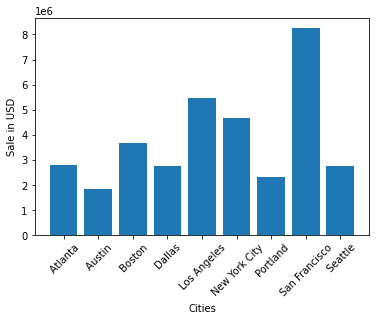

In [169]:
Cities = [city for city, sales in CT_sale_values.items()]

#Thực ra đoạn code [city for city, sales in CT_sale_values.items()] được viết lại từ đoạn sau:
# Cities = []
# for city, sales in CT_sale_values.items():
#         cities.append(city)
# cần có bước này để tên các nước trong chỉ mục Cities không bị sai thứ tự sắp xếp theo bảng tính toán,
# Chứ không là nó sẽ theo vị trí sắp xếp của bảng mà sai đi. khi xài code:
# Cities = df['City'].unique()

plt.bar(x = Cities , height = CT_sale_values)
plt.xticks(Cities, rotation = 45 )
plt.xlabel('Cities')
plt.ylabel('Sale in USD')
plt.show()

Sau khi hoàn thành câu hỏi từ task 2, sẽ có mấy câu hỏi phát sinh thêm như sau:
- Tại sao thành phố đó có doanh số bán hàng cao nhất? Vì nó là thành phố lớn hay tại đó đang có sự kiện gì chăng?
- Mấy thành phố kia không có doanh số cao bằng vì sao? Do nơi đó đang có sự cố hay vì tình hình đại dịch?

### Task 3: what time should we display ads to maximize the likelihood of customer's buying product?

In [171]:
print(df['Order Date'].dtype)

object


In [172]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3072535395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [173]:
print(df['Order Date'].dtype)

datetime64[ns]


In [177]:
df['Times'] = df['Order Date'].dt.hour
df['Times']

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3472694874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Times'] = df['Order Date'].dt.hour


0        21
1        14
2        13
3        20
4        11
         ..
11681    20
11682    16
11683     7
11684    17
11685     0
Name: Times, Length: 185950, dtype: int64

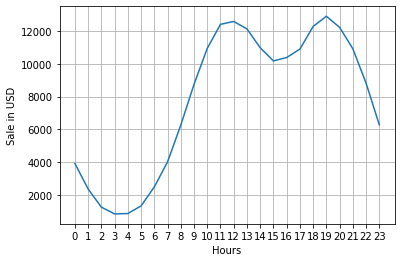

In [ ]:
# Để tính khung thời gian nào có số đơn đặt hàng nhiều nhất thì mình phải dùng count để đếm số đơn đặt hàng
# thay vì sum chỉ để tính tổng số tiền tại khung thời gian đó.
# ví dụ: lúc 8h có 1 đơn 6tr, nhưng lúc 5h lại có 12 đơn 50k, thì có nghĩa lúc 5h có số đơn đặt nhiều hơn
Hour_sale_values = df.groupby('Times').count()['Sales']
Hour_sale_values.sort_values(ascending = False)

#Visualize : nên dùng biểu đồ đường cho có tính liên tục để quan sát và đánh giá
Hours = [hour for hour, sales in Hour_sale_values.items()]
plt.plot(Hours, Hour_sale_values)
plt.grid()
plt.xticks(Hours, size = 10)
plt.xlabel('Hours')
plt.ylabel('Sale in USD')
plt.show()

Sau khi hoàn thành task 3 thì chỉ trả lời cho khung giờ chung thôi, nên sẽ phát sinh thêm câu:
- Có phải thành phố nào cũng có khung giờ bán được hàng chạy như vậy?

### Task 4: Which products are most often sold together?

Trả lời cho câu này thì sẽ phải chú ý đến những đơn hàng có cùng mã Order_ID. Nên check duplicate thôi.

In [203]:
df_dup = df[df['Order ID'].duplicated(keep= False)]

In [204]:
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Times
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


Nếu để nguyên bảng vầy mà làm tiếp thì phiền lắm, nên hãy nhóm các sản phẩm có cùng Order ID vào một hàng ứng với Order ID đó.

In [206]:
GroupProduct = lambda product: ','.join(product)

df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(GroupProduct)
df_dup.head()

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3214694702.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Product'] = df_dup.groupby('Order ID')['Product'].transform(GroupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Times,All Product
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"


Ra được cái bảng như trên thì loại duplicate đi.

In [218]:
df_product = df_dup.loc[:,('Order ID','All Product')].drop_duplicates()

In [220]:
df_product

,Order ID,All Product
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [225]:
df_product.value_counts('All Product').head(10)

All Product
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
dtype: int64

Thường sau khi có kết quả này, các doanh nghiệp có thể bán theo combo gồm : những sản phẩm bán chạy đính kèm + giảm giá sản phẩm ít bán chạy hơn. Để kích cầu khi mua các sản phẩm này.

### Task 5: Which product sold the most? Why do you think that?

In [236]:
Most_product = df.loc[:,('Product','Quantity Ordered')].groupby('Product').sum()['Quantity Ordered']

In [240]:
Most_product.sort_values(ascending = False).head(10)



Product
AAA Batteries (4-pack)        31017.0
AA Batteries (4-pack)         27635.0
USB-C Charging Cable          23975.0
Lightning Charging Cable      23217.0
Wired Headphones              20557.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
27in FHD Monitor               7550.0
iPhone                         6849.0
27in 4K Gaming Monitor         6244.0
Name: Quantity Ordered, dtype: float64

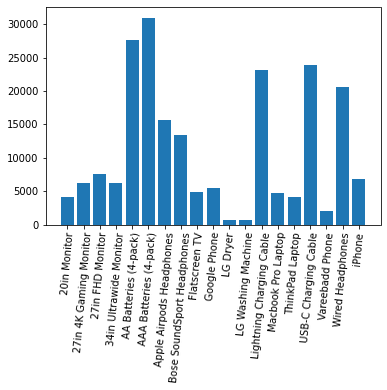

In [270]:
Most_products = [product for product, quantity in Most_product.items()]
plt.bar( x = Most_products, height = Most_product)
plt.xticks(Most_products, rotation = 85)
plt.show()

Để trả lời cho vế vì sao thì có thể cân nhắc 3 vấn đề: price, brand, quality

Dữ liệu nào có thì làm không có thì thôi, có gì xài nấy. Như Price đang có thì phân tích dựa trên Price.

In [273]:
Prices = df.groupby('Product').mean()['Price Each']
Prices.head()

Product
20in Monitor              109.989998
27in 4K Gaming Monitor    389.989990
27in FHD Monitor          149.990005
34in Ultrawide Monitor    379.989990
AA Batteries (4-pack)       3.840000
Name: Price Each, dtype: float32

C:\Users\Hlegrind\AppData\Local\Temp\ipykernel_6288\3725326079.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Most_products, rotation = 90)


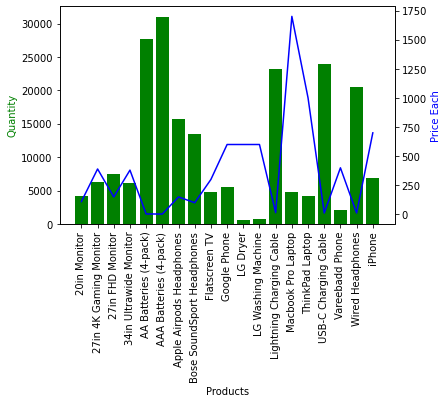

In [286]:
x = Most_products
y1 = Most_product
y2 = Prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color = 'g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(Most_products, rotation = 90)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity', color='g')
ax2.set_ylabel('Price Each', color='b')
plt.show()

Thông qua biểu đồ ta thấy được phần lớn các sản phẩm được mua nhiều đều là các sản phẩm giá siêu rẻ.